In [11]:
import os
from os import listdir
from os.path import isfile, join
import glob
from email.parser import Parser
import nltk     #bonus points
import email
import string
import operator
import matplotlib.pyplot as plt

# Topic 1 contains a lot of meeting related words, perhaps they are fromemails    that were sent as meeting notices.
# Topic 2 while related to business seems to be more about the processrather than the content of the core business. It has a lot of terms relevant to business legalities.

# Path to root directory

In [17]:
homedir = os.path.expanduser("~")
path_to_mail = homedir+"\\midterm\\data\\enron\\maildir\\"
print(path_to_mail)

C:\Users\priya\midterm\data\enron\maildir\


In [20]:
dist_1999={'topic_1':1,'topic_2':1} # defining 3 dictories for 3 years 
dist_2000={'topic_1':1,'topic_2':1}
dist_2001={'topic_1':1,'topic_2':1}
filtered_data=[]
demo=0

# Determining how many times meetings and business related terms are talked in emails

In 1999:  {'topic_1': 235, 'topic_2': 86}
in 2000:  {'topic_1': 5222, 'topic_2': 2024}
in 2001:  {'topic_1': 6417, 'topic_2': 1857}


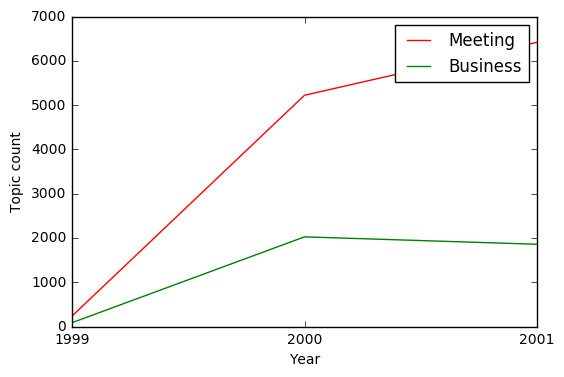

In [21]:
convicted_emp_names = ['skilling-j','lay-k']
topic1 = ['message','origin','pleas','please','email','thank','attach','file','copi','copy','inform','receiv','receive']
topic2 = ['enron','deal','agreement','change','contract','corp','fax','houston','date','america']
for name in convicted_emp_names:
    user_mail= path_to_mail+name
    #print(user_mail)
    for subdir, dirs, files in os.walk(user_mail):    # walking through all the emails
        for file in files:       
            if(file[0]!="."):              # ignoring the hidden files
                try:
                    response = open(os.path.join(subdir, file),'r', errors = 'ignore')
                    fp=Parser().parsestr(response.read())
                except:
                    print('error',os.path.join(subdir, file))
                    
                unfiltered_word_list = nltk.word_tokenize(fp.get_payload())  # Used NLtk to tokanize the mail body
                filtered_data=(removePunctuation(unfiltered_word_list))
                ##print(filtered_data)
                raw_date = fp['Date']                  # getting the date of the emails 
                date = email.utils.parsedate(raw_date)
                #print(date[0])
                for i in filtered_data:
                    if date[0] == 1999:
                        #print('here')
                        if i in topic1:
                            dist_1999['topic_1'] = dist_1999['topic_1']+1          # categorising the words 
                        if i in topic2:
                            dist_1999['topic_2'] = dist_1999['topic_2']+1
                    if date[0] == 2000:
                        if i in topic1:
                            dist_2000['topic_1'] = dist_2000['topic_1']+1
                        if i in topic2:
                            dist_2000['topic_2'] = dist_2000['topic_2']+1
                    if date[0] == 2001:
                        if i in topic1:
                            dist_2001['topic_1'] = dist_2001['topic_1']+1
                        if i in topic2:
                            dist_2001['topic_2'] = dist_2001['topic_2']+1
#sorted_characters = sorted(dist_1999.items(), key=operator.itemgetter(1), reverse = True) # sorting the dict based on frequency
#print('sorted frequency list: \n ',sorted_characters[:10])
print('In 1999: ',dist_1999)
print('in 2000: ',dist_2000)
print('in 2001: ',dist_2001)
my_xticks = ['1999','2000','2001']
x=[x1 for x1 in range(3)]
y1=[86,2024,1857]
y=[235,5222,6417]
plt.plot(x,y,c="r",label="Meeting")
plt.plot(x,y1,c="g",label="Business")
plt.xticks(x,my_xticks)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Topic count")
plt.show()
#print(demo)

In [6]:
def removePunctuation(unclear):
    filtered_words = [''.join(c for c in s if c not in string.punctuation) for s in unclear]
    filtered_words = [s for s in filtered_words if s]
    return filtered_words  